In [47]:
##creating dictionary 
from tqdm import tqdm
import os
import re
from matplotlib import pyplot as plt
import operator
import numpy as np
import pandas
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

In [2]:
#storing the path

path = r"C:\Users\adity\Desktop\20_newsgroups"
os.chdir(path)
dict_ = {}


In [3]:
##dictionary for ignoring the stop words

stop_words=["a","the","able","about","data", "about", "above", "above", "across", "after", "afterwards", "again", 
            "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst",
            "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", 
            "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", 
            "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", 
            "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", 
            "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", 
            "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything",
            "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", 
            "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", 
            "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", 
            "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", 
            "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", 
            "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", 
            "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", 
            "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", 
            "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves",
            "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", 
            "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six",
            "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", 
            "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", 
            "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", 
            "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too",
            "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", 
            "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", 
            "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", 
            "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your",
            "yours", "yourself", "yourselves", "the"]

In [4]:
#going through the file and creating our own dictionary
def reading_file (file_path):
    with open(file_path, 'r') as f:
        file_data = f.read().lower().strip()
        
        pattern = re.findall(r'\b[a-z]{3,}\b', file_data)
        for word in pattern:
            if (word not in stop_words):
                    count = dict_.get(word,0)
                    dict_[word] = count + 1

In [5]:
l = os.listdir(path)
for root , dirs , files in os.walk(path):
    for f in files:
        new_path = os.path.join(root , f)
        reading_file(new_path)

In [53]:
#sorting the dictionary according to the values 
sorted_word_dic = dict(sorted(dict_.items(), key=operator.itemgetter(1),reverse=True))

print(sorted_word_dic.values())

dict_values([164009, 52411, 50160, 34311, 32361, 26050, 25461, 23103, 21956, 21591, 20896, 20789, 20512, 20406, 20371, 20310, 19894, 19842, 18844, 17775, 16758, 15889, 14688, 14455, 13871, 13437, 12983, 11586, 11078, 11042, 10983, 10948, 10642, 10366, 10352, 9980, 9960, 9926, 9795, 9379, 9347, 9208, 9175, 8936, 8317, 8310, 8304, 8164, 8142, 7597, 7269, 7125, 7075, 7016, 6961, 6925, 6885, 6870, 6763, 6546, 6399, 6319, 6310, 6237, 6203, 6193, 6070, 6066, 5754, 5622, 5527, 5450, 5431, 5398, 5371, 5368, 5356, 5330, 5290, 5200, 5193, 5089, 4945, 4853, 4842, 4807, 4755, 4664, 4619, 4602, 4565, 4513, 4460, 4444, 4415, 4365, 4323, 4312, 4309, 4288, 4285, 4263, 4243, 4144, 4019, 3980, 3960, 3933, 3928, 3915, 3853, 3766, 3761, 3760, 3720, 3711, 3701, 3665, 3663, 3504, 3481, 3407, 3382, 3368, 3359, 3347, 3327, 3301, 3219, 3218, 3202, 3196, 3187, 3124, 3073, 3043, 3043, 3037, 2997, 2941, 2940, 2933, 2902, 2861, 2852, 2825, 2819, 2780, 2748, 2742, 2737, 2734, 2703, 2702, 2692, 2686, 2677, 2624, 261

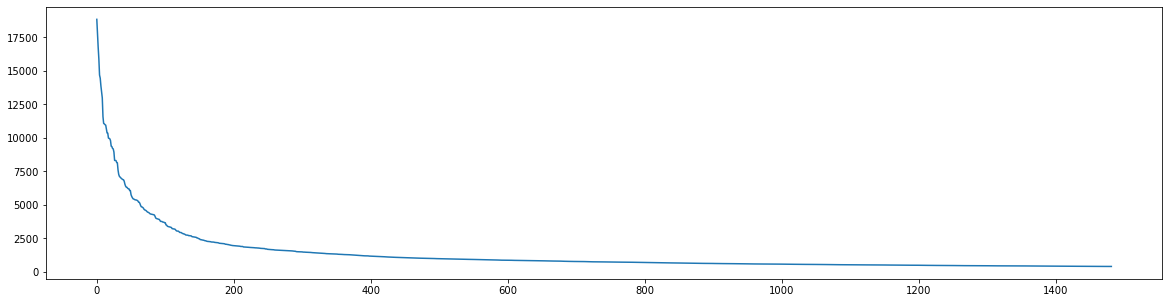

In [54]:
plt.figure(figsize = (20 , 5))
x = list(sorted_word_dic.keys())
y = list(sorted_word_dic.values())

x_axis = x[18:1500]
y_axis = y[18:1500]
plt.plot(np.arange(len(x_axis)) , y_axis)


In [55]:

##going through the file and storing the values in an array
def reading_file_aux (file_path):
    arr_ = [0]*len(x_axis)
  
    

    with open(file_path, 'r') as f:
        file_data = f.read().lower().strip()
        
        pattern = re.findall(r'\b[a-z]{3,}\b', file_data)
        for word in pattern:
            if word in x_axis:
                arr_[x_axis.index(word)] = arr_[x_axis.index(word)]+1
             
            
            
        
            
                        
            
    return arr_
                    

In [56]:
## cretaing my dataset , 2d array containing the values of each word coming how many times in one txt file

dataset = []

l_aux = os.listdir(path)
for root , dirs , files in os.walk(path):
    for f in files:
        ##calling the function on the specified path
        new_path = os.path.join(root , f)
        
        arr = reading_file_aux(new_path)
        ##appending the base name which is the file name (target)
        arr.append(os.path.basename(root))
        dataset.append(arr)
        

print(len(dataset[0]))

1483


In [19]:
print(len(dataset))

19997


In [57]:
##deep copying the names of the features 

columns = x_axis.copy()

##appending the y target name as classAlp
columns.append("classAlp")
print(columns)

['state', 'gmt', 'sci', 'ohio', 'writes', 'rec', 'politics', 'article', 'references', 'windows', 'ans', 'sender', 'howland', 'reston', 'don', 'people', 'like', 'just', 'university', 'alt', 'posting', 'nntp', 'religion', 'mps', 'know', 'host', 'think', 'usenet', 'zaphod', 'soc', 'sys', 'hardware', 'does', 'christian', 'time', 'rutgers', 'use', 'harvard', 'eng', 'near', 'new', 'space', 'sport', 'ibm', 'good', 'crabapple', 'sei', 'noc', 'das', 'xref', 'cis', 'graphics', 'mac', 'europa', 'gtefsd', 'ece', 'uunet', 'god', 'world', 'way', 'org', 'say', 'make', 'gov', 'right', 'rochester', 'max', 'forsale', 'distribution', 'did', 'club', 'guns', 'atheism', 'mail', 'andrew', 'want', 'gatech', 'magnesium', 'said', 'udel', 'reply', 'sun', 'utexas', 'used', 'culture', 'need', 'hockey', 'uiuc', 'work', 'nasa', 'really', 'autos', 'baseball', 'problem', 'med', 'computer', 'mideast', 'sura', 'believe', 'electronics', 'crypt', 'netcom', 'usa', 'years', 'motorcycles', 'going', 'government', 'information

In [58]:
##creating the dataframe from the csv file

indexes = np.arange(len(dataset))
index = indexes.tolist()
df = pandas.DataFrame(dataset , index , columns)
df

,state,gmt,sci,ohio,writes,rec,politics,article,references,windows,...,random,developed,specifically,fair,latest,supported,safe,jason,daniel,classAlp
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,20_newsgroups
1,2,2,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,01
2,9,2,0,0,0,0,1,6,0,0,...,1,1,0,0,0,0,0,0,0,01
3,0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,01
4,3,1,0,0,1,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,3,1,0,3,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,20
19994,3,1,0,3,2,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,20
19995,0,0,2,0,1,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,20
19996,3,0,0,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,20


##***Implementation of SKlearn Classifier***


In [59]:
# Appending dataframe to csv file
df.to_csv("text_classification1.csv",index=False)

# Y is the target class
Y = df["classAlp"]

# X is features 
X = df[df.columns[:-1]].values

# Splitting the data into training and testing with 75,25 ratio
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.25,random_state=0)
len(X[0])

1482

##***Multinomial Naive Bayes***

In [65]:
# Creating a classifier object for Multinomial Naive Bayes
clf = MultinomialNB()

# Fitting the classifier object to training data
clf.fit(X_train, Y_train)

# Testing the classifier and storing the predicted classes in Y_pred
Y_pred = clf.predict(X_test)

# Generating the classification report and printing the confusion matrix
print("Classification Report :")
print(classification_report(Y_test,Y_pred , zero_division = 1))
print(confusion_matrix(Y_test,Y_pred))

Classification Report :
               precision    recall  f1-score   support

           01       0.77      0.84      0.80       233
           02       0.81      0.75      0.78       253
           03       0.86      0.73      0.79       249
           04       0.75      0.82      0.78       240
           05       0.82      0.90      0.86       236
           06       0.83      0.80      0.81       240
           07       0.85      0.92      0.88       261
           08       0.89      0.91      0.90       270
           09       0.90      0.96      0.93       283
           10       0.95      0.92      0.94       249
           11       0.90      0.96      0.93       212
           12       0.97      0.97      0.97       237
           13       0.89      0.86      0.87       261
           14       0.95      0.88      0.91       246
           15       0.91      0.92      0.91       238
           16       0.96      1.00      0.98       264
           17       0.81      0.88      

In [67]:
# Classification report for sklearn classifier , extracting the class names and their respective score
sklearn_classifier = classification_report(Y_test,Y_pred , zero_division = 1).split("\n")
for i in sklearn_classifier:
  if i == "" :
    sklearn_classifier.remove(i)
# sklearn_classifier[1].split()[-2]
# Storing class name and score in seperate list for plotting
class_name = []
sklearn_score = []
for j in sklearn_classifier[1:-3]:
  class_name.append(j.split()[0])
  sklearn_score.append(float(j.split()[-2]))
# print(class_name)
# print(sklearn_score)

# OWN classifier


In [68]:
# Fitting the function on training data
def fit(X_train,Y_train):

    """Function
                fit() :
                    Arguments : Training Data (X_train,Y_train)
                    Returns   : Dictionary >>> Keys : Class name and total count of all features
                                               Values : Dictionary >>> Keys : Words and total count of words
                                                                              in current class
                                                                       Values : Frequency of words
                                                                                in current class
    """
    #current_class : Total no. of classes
    # current_values : Total no. of features
    # j : Total no. of possible values for each feature
    
    # Initialising an empty dictionary to store class name and total count of all features
    result = {}

    # Initialising total data as zero
    result["total_data"] = 0

    # All unique class values
    class_values = set(Y_train)

    # Traversing through class values  
    for current_class in class_values:

        # Initialising an empty dictionary for current class
        result[current_class] = {}
        
        # getting the data points which belongs to current class by using a boolean array
        current_class_rows = (Y_train == current_class)
        
        # Storing the features of current class datapoints and
        # target class of current class datapoints
        X_train_current = X_train[current_class_rows]
        Y_train_current = Y_train[current_class_rows]

        # total number of features
        num_features = X_train.shape[1]

        # Initialising the total count for current class as zero
        result[current_class]["total_count"] =0

        # Traversing through each feature
        for j in range(num_features) :

            # Number of time the jth word appeared in current class features  
            result[current_class][j] = X_train_current[:,j].sum()

            # Updating the total count of word
            result[current_class]["total_count"] += result[current_class][j]
        
        # Updating total words of all documents
        result["total_data"] += result[current_class]["total_count"]
        
    return result

In [69]:
# Finding probablity for a specific class
def probability(dictionary, x, current_class):
    """ Funtion
            probability() :
                Arguments : dictionary (returned from fit function), a data point from X_test, and the class to find the 
                            probablity
                Returns   : probablity of the particular current_class
    """
    
    
    # Calculating the log probablities to avoid the final probablities to approaching zero
    # Using the Multinomial Naive Bayes formula to calculate the probability for a particular class
    output = np.log(dictionary[current_class]["total_count"]) - np.log(dictionary["total_data"])
    
    # Finding the total number of features
    num_features = len(x)
    
    # Traversing through each feature
    for j in range(num_features):
        xj = x[j]
        # Ignoring the features whose value is zero to avoid unnecessary calcualtions
        if x[j]==0:
            continue

        # Using the multinomial Naive Bayes formula to calculate the probablity
        # Also added the Laplace Correction to the formula
        # (Adding '1' to numerator and Adding no. of features to denominator)

        current_class_with_xj = dictionary[current_class][j] + 1
        current_class_total_count = dictionary[current_class]["total_count"] + num_features
        
        # Finding the log probablities
        current_xj_prob = np.log(current_class_with_xj) - np.log(current_class_total_count)

        # Adding to the intial output value to get the final value
        output += current_xj_prob
   
    return output

In [32]:
# Predicting the best class for each data point
def predict_single_point(dictionary, x):

    """ Function 
                 predict_single_point() :
                     Arguments : dictionary (returned from fit function), a data point from X_test
                     Returns   : best predicted class from data point
    """
    # Storing all the class names
    classes = dictionary.keys()

    # Initialising best probability as big negative number
    best_prob = -1000

    # Initialising the best predicted class as -1
    best_class = -1

    # Using boolean to get the class in first time run,in order to get the best class
    first_run = True

    # Traversing through each current class and if current class equals total data then continue
    for current_class in classes :
        if (current_class == "total_data"):
            continue
        
        # Calling Probability function on dictionary from the fit function ,X_test and current class
        p_current_class = probability(dictionary,x,current_class)

        # Checking if the probablity is best from the previous one, if yes then update it otherwise continue
        if (first_run or p_current_class > best_p):
            
            # Updating the best probability and current class
            best_p = p_current_class
            best_class = current_class
        # Changing value of first run to False
        first_run = False


    return best_class

In [70]:
# Predicting the classes
def predict(dictionary,X_test):

    """Function
                predict() :
                    Arguments : dictionary (returned from fit function), a data point from X_test
                    Returns   : predicted classes
    """
    # Initialsing the list to store best predicted classes
    y_pred = []

    # Traversing through the each data point in testing data 
    for x in tqdm(X_test,desc = "progress") :

        # Predicting the best class for each single point 
        x_class = predict_single_point(dictionary,x)

        # Appending the best predicted classes to the list
        y_pred.append(x_class)
    return y_pred 

In [71]:
# Y_new : target data
Y_new = df["classAlp"]

# X_new : features
X_new = df[df.columns[:-1]].values

# Splitting the data into training and testing 
X_train_new,X_test_new,Y_train_new,Y_test_new = model_selection.train_test_split(X_new,Y_new,test_size=0.25,random_state=0)


In [72]:
# Fitting the classifier object to training data
dictionary = fit(X_train_new,Y_train_new)

In [73]:
# Testing the classifier and storing the predicted Y_pred_new classes
Y_pred_new = predict(dictionary,X_test_new)

progress: 100%|████████████████████████████████████████████████████████████████████| 5000/5000 [01:44<00:00, 47.63it/s]


In [74]:
# Generating the classification report and printing the confusion matrix
print("Classification Report : ")
print(classification_report(Y_test_new,Y_pred_new , zero_division = 1))
print(confusion_matrix(Y_test_new,Y_pred_new))

Classification Report : 
               precision    recall  f1-score   support

           01       0.75      0.84      0.80       233
           02       0.78      0.73      0.75       253
           03       0.89      0.60      0.72       249
           04       0.75      0.82      0.79       240
           05       0.81      0.94      0.87       236
           06       0.78      0.82      0.80       240
           07       0.89      0.95      0.92       261
           08       0.94      0.94      0.94       270
           09       0.97      0.98      0.97       283
           10       0.97      0.93      0.95       249
           11       0.93      0.98      0.95       212
           12       0.98      0.96      0.97       237
           13       0.86      0.93      0.89       261
           14       0.95      0.95      0.95       246
           15       0.97      0.91      0.94       238
           16       0.98      1.00      0.99       264
           17       0.76      0.90     

In [76]:
# Classification report for sklearn classifier , extracting the class names and their respective score
own_classifier = classification_report(Y_test_new,Y_pred_new , zero_division = 1).split("\n")
for i in own_classifier:
    if i == "" :
        own_classifier.remove(i)
# own_classifier[1].split()[-2]
# Storing class name and score in seperate list for plotting
class_name = []
own_classifier_score = []
for j in own_classifier[1:-3]:
    class_name.append(j.split()[0])
    own_classifier_score.append(float(j.split()[-2]))
# print(class_name)
# print(own_classifier_score)

# Own VS Inbuilt
X : Class Name
Y : Own Classifier Score
 Magenta : Sklearn Classifier
 Cyan : Own Classifier

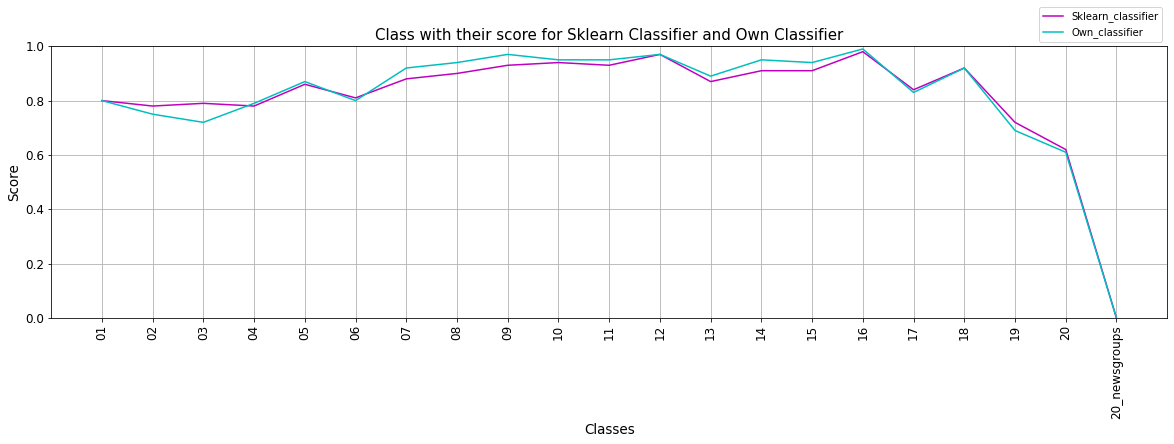

In [77]:
plt.subplots(figsize = (20,5))
plt.plot(class_name,sklearn_score,color ='m',label = 'Sklearn_classifier')
plt.plot(class_name,own_classifier_score,color = 'c',label = 'Own_classifier')
plt.xticks(rotation = 90,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Classes",fontsize = 13.5)
plt.ylabel("Score",fontsize = 13.5)
plt.title("Class with their score for Sklearn Classifier and Own Classifier",fontsize = 15)
plt.ylim(0,1)
plt.legend(loc='center right', bbox_to_anchor=(1, 1.08))
plt.grid()
plt.show()

**Accuracy Comparision**

In [78]:
# Printing the accuracy for Sklearn classifier and Own classifier
print("Sklearn Classifier Accuracy : ",float(sklearn_classifier[-3].split()[1]))
print("Own Classifier Accuracy : ",float(own_classifier[-3].split()[1]))

Sklearn Classifier Accuracy :  0.86
Own Classifier Accuracy :  0.86
